# Deep Learning for Business Applications course

## TOPIC 5: Object detection problem. YOLO training

### 1. Libraries

In [ ]:
!pip install ultralytics

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics import YOLO

### 2. YOLO model

In [2]:
# load a pretrained model
# (recommended for training)
MODEL_NAME = 'yolov8n.pt'
model = YOLO(MODEL_NAME)

In [3]:
!ls -la $MODEL_NAME

-rw-rw-r-- 1 jovyan users 6549796 Sep 30 12:43 yolov8n.pt


In [4]:
# run inference on an image or list of images
# inference by batch or a single image
DATA_PATH = '/home/jovyan/__DATA/DLBA_F25/topic_04'
img_path = f'{DATA_PATH}/foods.jpg'
results = model(img_path)


image 1/1 /home/jovyan/__DATA/DLBA_F25/topic_04/foods.jpg: 384x640 1 cup, 12 sandwichs, 1 orange, 1 dining table, 83.2ms
Speed: 2.7ms preprocess, 83.2ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


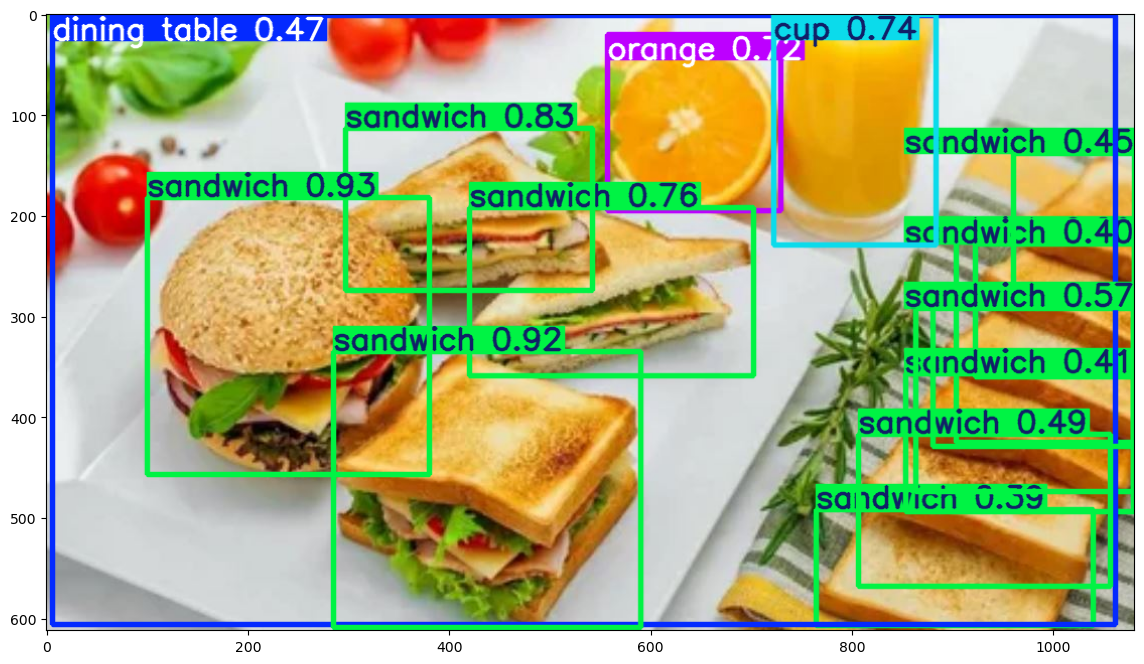

In [5]:
for result in results:
    boxes = result.boxes  # boxes object for bounding box outputs
    masks = result.masks  # masks object for segmentation masks outputs
    keypoints = result.keypoints  # keypoints object for pose outputs
    probs = result.probs  # probs object for classification outputs
    obb = result.obb  # oriented boxes object for OBB outputs
    img_bgr = result.plot()  # BGR-order numpy array
    img_rgb = Image.fromarray(img_bgr[..., ::-1])  # RGB-order PIL image
    plt.figure(figsize=(16, 8))
    plt.imshow(img_rgb)
    plt.show()

### 3. Train new classes

A [good article](https://learnopencv.com/mean-average-precision-map-object-detection-model-evaluation-metric/) about CV metrics for object detection tasks.

__TL;DR__ Mean Average Precision (mAP) in Object Detection - mAP (0.5) is the mean average precision calculated with an IoU (Intersection over Union, a metric that quantifies the degree of overlap between predicted and gound truth regions) threshold of 0.5, while mAP (0.95) uses a stricter threshold of 0.95.

In [ ]:
# train the model
results = model.train(
    data='burgers.yaml',
    epochs=100
)

In [ ]:
!ls -la runs/detect/

In [8]:
# every new training results are stored
# in a new folder `train`, `train1`, `train2`, etc.

TRAIN_PATH = '/train'

In [ ]:
!ls -la runs/detect/$TRAIN_PATH

In [ ]:
# plot training results

results_img = Image.open(f'runs/detect/{TRAIN_PATH}/results.png')
plt.figure(figsize=(16, 8))
plt.imshow(results_img)
plt.show()

In [ ]:
# plot validation batch images

val_img = Image.open(f'runs/detect/{TRAIN_PATH}/val_batch0_pred.jpg')
plt.figure(figsize=(16, 16))
plt.imshow(val_img)
plt.show()

### 4. Trained model inference

In [9]:
# load previously trained model
# use `best` to load best performance model
model = YOLO(f'runs/detect/{TRAIN_PATH}/weights/best.pt')


image 1/1 /home/jovyan/__DATA/DLBA_F25/topic_04/foods.jpg: 384x640 1 burger, 45.7ms
Speed: 2.2ms preprocess, 45.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


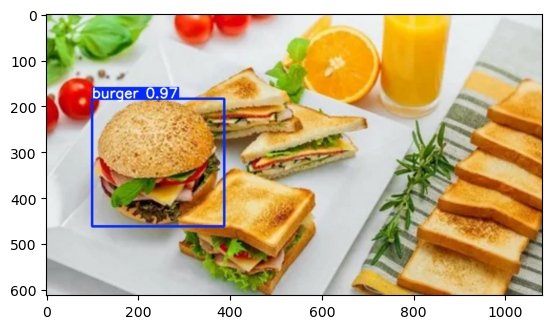

In [10]:
# inference for the test image
results = model(img_path)

# plot the results of inference
for result in results:
    boxes = result.boxes
    img_bgr = result.plot()
    img_rgb = Image.fromarray(img_bgr[..., ::-1])
    plt.imshow(img_rgb)
    plt.show()

### <font color='red'>HOME ASSIGNMENT</font>

The main goal for the home assignment is to train YOLO for a new class detection:
1. Take the labeled data (train and validation dataset) and organize folders for training process. Use the pipeline from the class.
2. Train the YOLO with default parameters and get first result. Then try to play with the number of epochs to train and find the optimal number of epochs.
3. Elaborate on the results. Are you satisfied with the accuracy of detection? What improvements could be made?